In [1]:
import pandas as pd
file_path = "sp500_historical_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Close,High,Low,Open,Volume
0,2019-01-02,2510.03,2519.49,2467.47,2476.96,3733160000
1,2019-01-03,2447.89,2493.14,2443.96,2491.92,3858830000
2,2019-01-04,2531.94,2538.07,2474.33,2474.33,4234140000
3,2019-01-07,2549.69,2566.16,2524.56,2535.61,4133120000
4,2019-01-08,2574.41,2579.82,2547.56,2568.11,4120060000


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df['Target'] = (df['Close'].diff() > 0).astype(int)
df = df.iloc[1:].reset_index(drop=True)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy, report


(0.6384364820846905,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.27      0.40       139\n           1       0.61      0.95      0.74       168\n\n    accuracy                           0.64       307\n   macro avg       0.71      0.61      0.57       307\nweighted avg       0.70      0.64      0.59       307\n')

In [4]:
df

,Date,Close,High,Low,Open,Volume,Target
0,2019-01-03,2447.89,2493.14,2443.96,2491.92,3858830000,0
1,2019-01-04,2531.94,2538.07,2474.33,2474.33,4234140000,1
2,2019-01-07,2549.69,2566.16,2524.56,2535.61,4133120000,1
3,2019-01-08,2574.41,2579.82,2547.56,2568.11,4120060000,1
4,2019-01-09,2584.96,2595.32,2568.89,2580.00,4088740000,1
...,...,...,...,...,...,...,...
1529,2025-02-03,5994.57,6022.13,5923.93,5969.65,4797210000,0
1530,2025-02-04,6037.88,6042.48,5990.87,5998.14,4410160000,1
1531,2025-02-05,6061.48,6062.86,6007.06,6020.45,4756250000,1
1532,2025-02-06,6083.57,6084.03,6046.83,6072.22,4847120000,1


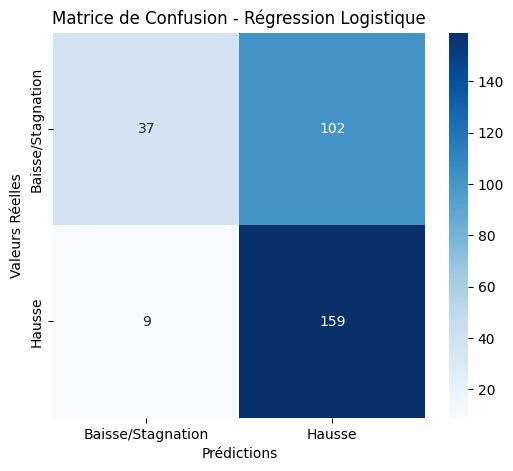

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()


In [21]:
df['Return'] = df['Close'].pct_change() * 100
df['Open_Close_Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df = df.dropna().reset_index(drop=True)

X_new = df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_new = df['Target']

X_new_scaled = scaler.fit_transform(X_new)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42, stratify=y_new)

model_new = LogisticRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
report_new = classification_report(y_test_new, y_pred_new)
accuracy_new, report_new


(0.972972972972973,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97       134\n           1       0.99      0.96      0.97       162\n\n    accuracy                           0.97       296\n   macro avg       0.97      0.97      0.97       296\nweighted avg       0.97      0.97      0.97       296\n')

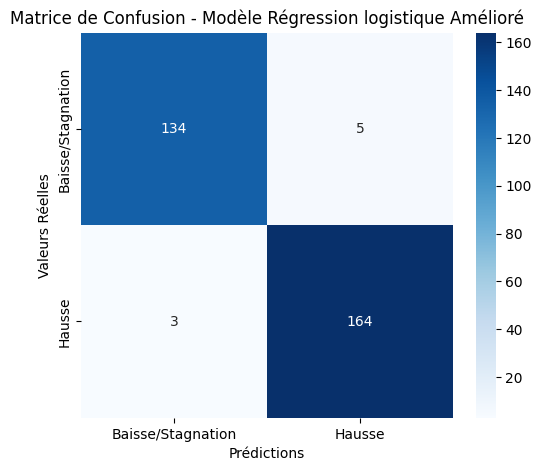

In [ ]:
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle Régression Logistique Amélioré")
plt.show()


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']
X_train_time = train_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_train_time = train_df['Target']
X_test_time = test_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_test_time = test_df['Target']

X_train_time_scaled = scaler.fit_transform(X_train_time)
X_test_time_scaled = scaler.transform(X_test_time)

model_time = LogisticRegression()
model_time.fit(X_train_time_scaled, y_train_time)

y_pred_time = model_time.predict(X_test_time_scaled)
accuracy_time = accuracy_score(y_test_time, y_pred_time)
report_time = classification_report(y_test_time, y_pred_time)

accuracy_time, report_time


(0.9675090252707581,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96       119\n           1       0.99      0.95      0.97       158\n\n    accuracy                           0.97       277\n   macro avg       0.96      0.97      0.97       277\nweighted avg       0.97      0.97      0.97       277\n')

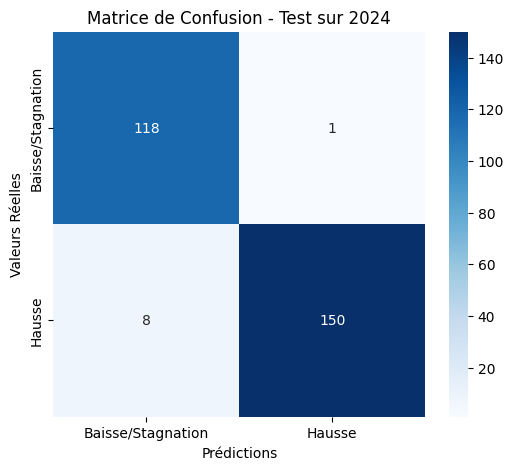

In [23]:
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_time, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Test sur 2024")
plt.show()


In [26]:
window_rsi = 14
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=window_rsi).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_rsi).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

short_window = 12
long_window = 26
signal_window = 9
df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']
window_bb = 20
df['Middle_BB'] = df['Close'].rolling(window=window_bb).mean()
df['Std_BB'] = df['Close'].rolling(window=window_bb).std()
df['Upper_BB'] = df['Middle_BB'] + (df['Std_BB'] * 2)
df['Lower_BB'] = df['Middle_BB'] - (df['Std_BB'] * 2)
df = df.dropna().reset_index(drop=True)

train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']

X_train_tech = train_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Upper_BB', 'Middle_BB', 'Lower_BB']]
y_train_tech = train_df['Target']
X_test_tech = test_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Upper_BB', 'Middle_BB', 'Lower_BB']]
y_test_tech = test_df['Target']

X_train_tech_scaled = scaler.fit_transform(X_train_tech)
X_test_tech_scaled = scaler.transform(X_test_tech)

model_tech = LogisticRegression()
model_tech.fit(X_train_tech_scaled, y_train_tech)

y_pred_tech = model_tech.predict(X_test_tech_scaled)
accuracy_tech = accuracy_score(y_test_tech, y_pred_tech)
report_tech = classification_report(y_test_tech, y_pred_tech)

accuracy_tech, report_tech


(0.9711191335740073,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       119\n           1       0.98      0.97      0.97       158\n\n    accuracy                           0.97       277\n   macro avg       0.97      0.97      0.97       277\nweighted avg       0.97      0.97      0.97       277\n')

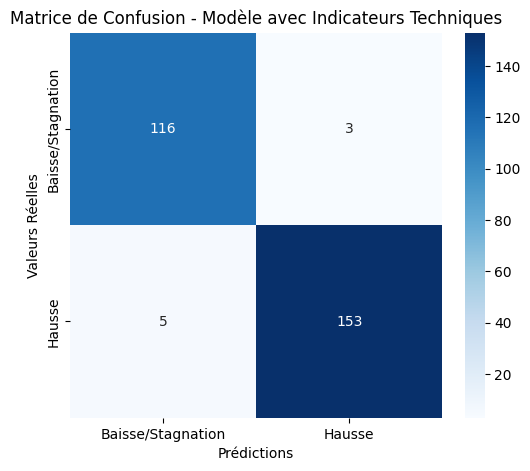

In [27]:
conf_matrix_tech = confusion_matrix(y_test_tech, y_pred_tech)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tech, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle avec Indicateurs Techniques")
plt.show()


Importing plotly failed. Interactive plots will not work.
10:23:07 - cmdstanpy - INFO - Chain [1] start processing
10:23:08 - cmdstanpy - INFO - Chain [1] done processing


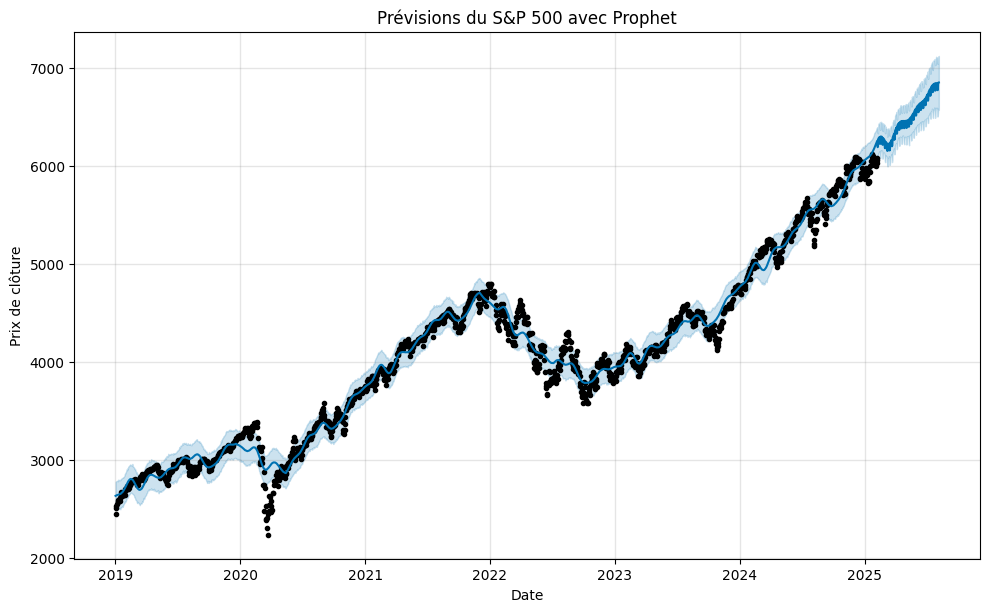

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,2634.502589,2496.862984,2774.814549
1,2019-01-03,2636.252997,2493.577129,2780.888192
2,2019-01-04,2639.164545,2498.314940,2783.590499
3,2019-01-07,2642.938533,2489.507295,2786.939248
4,2019-01-08,2643.725141,2503.516642,2791.364041
5,2019-01-09,2644.651522,2499.249171,2783.403458
6,2019-01-10,2645.596314,2504.112315,2800.375003
7,2019-01-11,2647.865785,2500.925363,2796.188185
8,2019-01-14,2651.034084,2510.166465,2794.623552
9,2019-01-15,2652.150826,2500.788387,2795.747732


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("sp500_historical_data_cleaned.csv")
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Prévisions du S&P 500 avec Prophet")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")


Mean Absolute Error (MAE) : 82.91
Root Mean Squared Error (RMSE) : 113.77


10:26:23 - cmdstanpy - INFO - Chain [1] start processing
10:26:24 - cmdstanpy - INFO - Chain [1] done processing


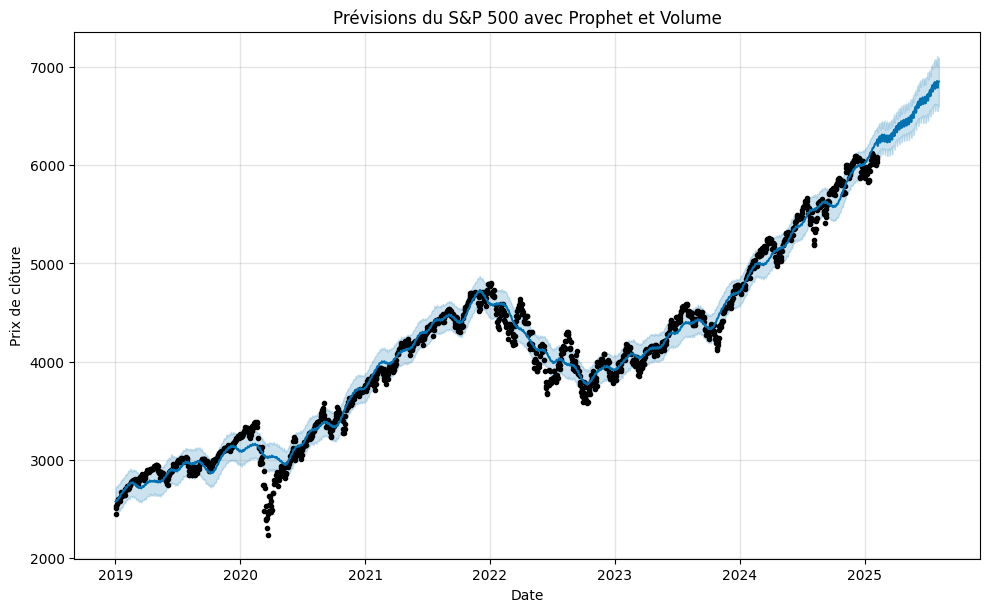

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,2574.854053,2438.279337,2709.392574
1,2019-01-03,2578.181375,2446.750980,2719.429595
2,2019-01-04,2589.910744,2453.812579,2731.639992
3,2019-01-07,2583.515195,2452.898971,2722.545649
4,2019-01-08,2591.686095,2451.374453,2729.891288
5,2019-01-09,2597.438018,2459.823947,2744.483607
6,2019-01-10,2603.083232,2465.482506,2750.515255
7,2019-01-11,2616.963832,2475.219418,2750.043313
8,2019-01-14,2615.829579,2482.742135,2756.801411
9,2019-01-15,2625.317646,2492.532759,2768.368217


In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("sp500_historical_data_cleaned.csv")
df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  
model.fit(df_prophet)
future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Prévisions du S&P 500 avec Prophet et Volume")
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.show()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")


Mean Absolute Error (MAE) : 88.66
Root Mean Squared Error (RMSE) : 122.03


10:30:41 - cmdstanpy - INFO - Chain [1] start processing
10:30:42 - cmdstanpy - INFO - Chain [1] done processing


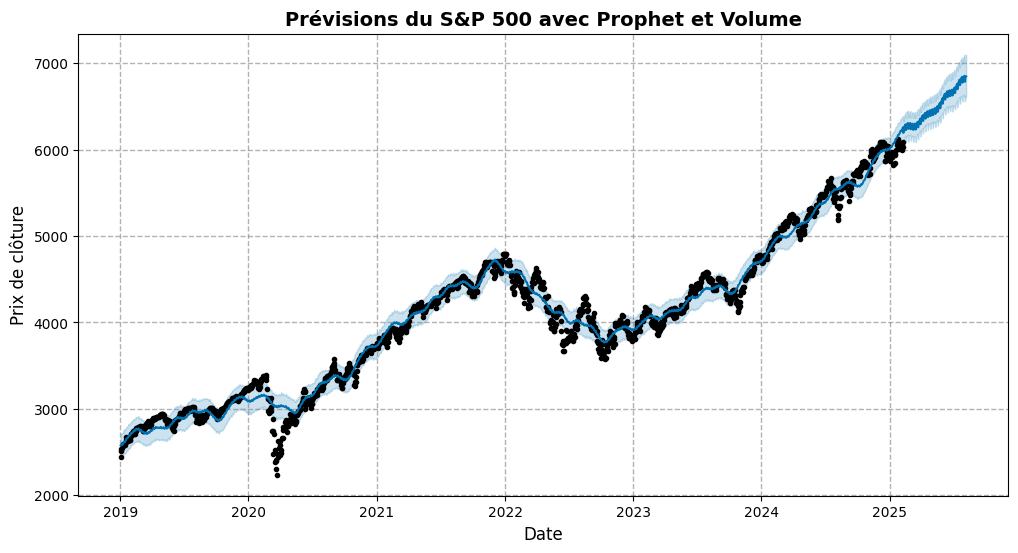

,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,2574.854053,2447.533168,2715.173321
1,2019-01-03,2578.181375,2439.664349,2707.849395
2,2019-01-04,2589.910744,2454.124377,2718.493101
3,2019-01-07,2583.515195,2451.822330,2716.050743
4,2019-01-08,2591.686095,2456.849562,2721.400765
5,2019-01-09,2597.438018,2461.375551,2741.104640
6,2019-01-10,2603.083232,2467.879411,2726.018889
7,2019-01-11,2616.963832,2483.652728,2764.820186
8,2019-01-14,2615.829579,2479.633876,2756.488238
9,2019-01-15,2625.317646,2484.268701,2771.124072


In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("sp500_historical_data_cleaned.csv")
df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  

model.fit(df_prophet)

future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions du S&P 500 avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)


In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
mse = mean_squared_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")


Mean Absolute Error (MAE) : 88.66
Root Mean Squared Error (RMSE) : 122.03


10:39:20 - cmdstanpy - INFO - Chain [1] start processing
10:39:20 - cmdstanpy - INFO - Chain [1] done processing


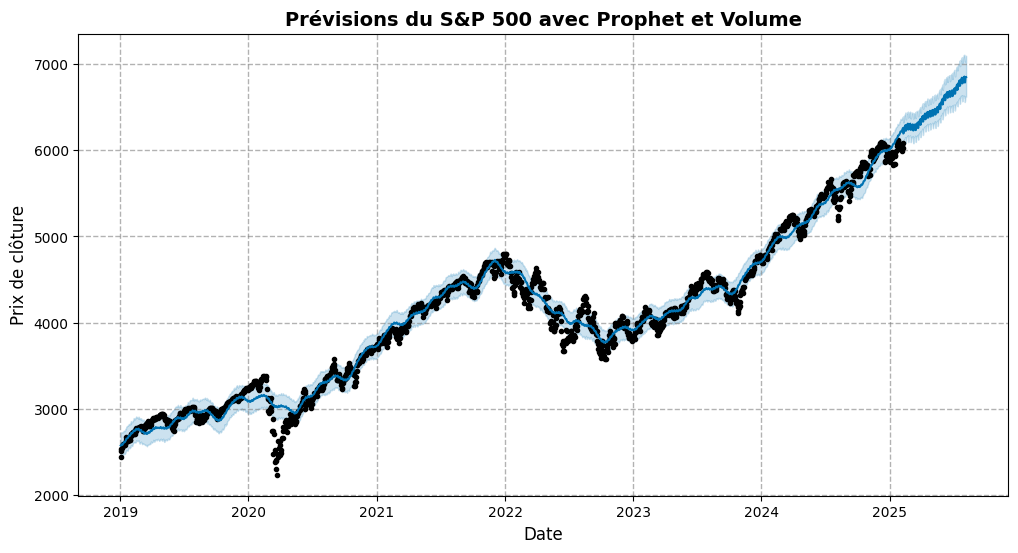

  0%|          | 0/8 [00:00<?, ?it/s]

10:39:21 - cmdstanpy - INFO - Chain [1] start processing
10:39:21 - cmdstanpy - INFO - Chain [1] done processing
10:39:21 - cmdstanpy - INFO - Chain [1] start processing
10:39:22 - cmdstanpy - INFO - Chain [1] done processing
10:39:22 - cmdstanpy - INFO - Chain [1] start processing
10:39:22 - cmdstanpy - INFO - Chain [1] done processing
10:39:22 - cmdstanpy - INFO - Chain [1] start processing
10:39:23 - cmdstanpy - INFO - Chain [1] done processing
10:39:23 - cmdstanpy - INFO - Chain [1] start processing
10:39:23 - cmdstanpy - INFO - Chain [1] done processing
10:39:24 - cmdstanpy - INFO - Chain [1] start processing
10:39:24 - cmdstanpy - INFO - Chain [1] done processing
10:39:24 - cmdstanpy - INFO - Chain [1] start processing
10:39:25 - cmdstanpy - INFO - Chain [1] done processing
10:39:25 - cmdstanpy - INFO - Chain [1] start processing
10:39:26 - cmdstanpy - INFO - Chain [1] done processing


  horizon           mse        rmse         mae      mape     mdape
0 18 days  24079.216841  155.174794  112.489393  0.026228  0.016706
1 19 days  26348.839531  162.323256  114.528795  0.026847  0.016024
2 20 days  27456.268290  165.699331  117.118560  0.027402  0.016024
3 21 days  28620.700712  169.176537  120.835800  0.028175  0.015825
4 22 days  32119.368807  179.218774  128.683705  0.029962  0.016706


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-02,2574.854053,2435.152410,2707.148586
1,2019-01-03,2578.181375,2440.720243,2727.222666
2,2019-01-04,2589.910744,2448.662508,2730.331634
3,2019-01-07,2583.515195,2444.677433,2726.662449
4,2019-01-08,2591.686095,2453.425488,2734.251009
5,2019-01-09,2597.438018,2467.437739,2731.647126
6,2019-01-10,2603.083232,2472.644469,2739.154392
7,2019-01-11,2616.963832,2483.967745,2748.768847
8,2019-01-14,2615.829579,2477.850142,2743.363291
9,2019-01-15,2625.317646,2490.389467,2757.179521


In [8]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt

df = pd.read_csv("sp500_historical_data_cleaned.csv")

df_prophet = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y', 'Volume': 'add1'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
model = Prophet()
model.add_regressor('add1')  
model.fit(df_prophet)
future = model.make_future_dataframe(periods=180)
future['add1'] = df_prophet['add1'].mean()  
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
ax.set_title("Prévisions du S&P 500 avec Prophet et Volume", fontsize=14, fontweight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Prix de clôture", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='180 days')
metrics = performance_metrics(cv_results)
print(metrics[['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape']].head())
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)
